In [28]:
import pandas as pd
import math
import numpy

## Importing the datasets

In [29]:
df = pd.read_csv("50_Startups.csv")
# df.head()

In [30]:
df['profit'] = df['Profit']
df.drop(columns=[], axis=1,inplace=True)
df.drop(columns=['Profit', 'State' , 'Administration',  'Marketing Spend' ], axis=1,inplace=True)
df.head()

,R&D Spend,profit
0,165349.20,192261.83
1,162597.70,191792.06
2,153441.51,191050.39
3,144372.41,182901.99
4,142107.34,166187.94


In [31]:
X = df.drop('profit', axis=1)
y = df['profit'].values
# print(type(X))

## classifying the data into train and test

In [32]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=2)

## Creating the model

In [33]:
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor 
model = RandomForestRegressor(n_estimators=30)
model.fit(X_train, y_train)

RandomForestRegressor(n_estimators=30)

## Predicting the values

In [34]:
ypred = model.predict(X_test)
# print(ypred)

In [35]:
print("Diffrence between Actual and Predicted Profit is : \n")
for i in range(len(ypred)):
    print(f"{y_test[i]} - {ypred[i]} = {math.floor(y_test[i] - ypred[i])}")

Diffrence between Actual and Predicted Profit is : 

90708.19 - 77895.12133333333 = 12813
42559.73 - 28402.174666666677 = 14157
103282.38 - 101619.47999999998 = 1662
149759.96 - 144068.56766666664 = 5691
134307.35 - 128937.07699999998 = 5370
192261.83 - 189940.46799999994 = 2321
65200.33 - 75409.73400000001 = -10210
49490.75 - 55199.337333333344 = -5709
81005.76 - 89874.38833333334 = -8869
108733.99 - 101619.47999999998 = 7114
108552.04 - 119313.53466666666 = -10762
35673.41 - 55199.337333333344 = -19526
125370.37 - 135626.91733333335 = -10257


## Accuracy of the programme

In [36]:
from sklearn.metrics import r2_score
print(f'Accuracy: { r2_score(y_test, ypred) }')

Accuracy: 0.9470643123524254


In [37]:
## Visualizing the graph

In [38]:
import matplotlib.pyplot as plt
from sklearn import tree
from dtreeviz.trees import dtreeviz # will be used for tree visualization
plt.rcParams.update({'figure.figsize': (12.0, 8.0)})
plt.rcParams.update({'font.size': 14})

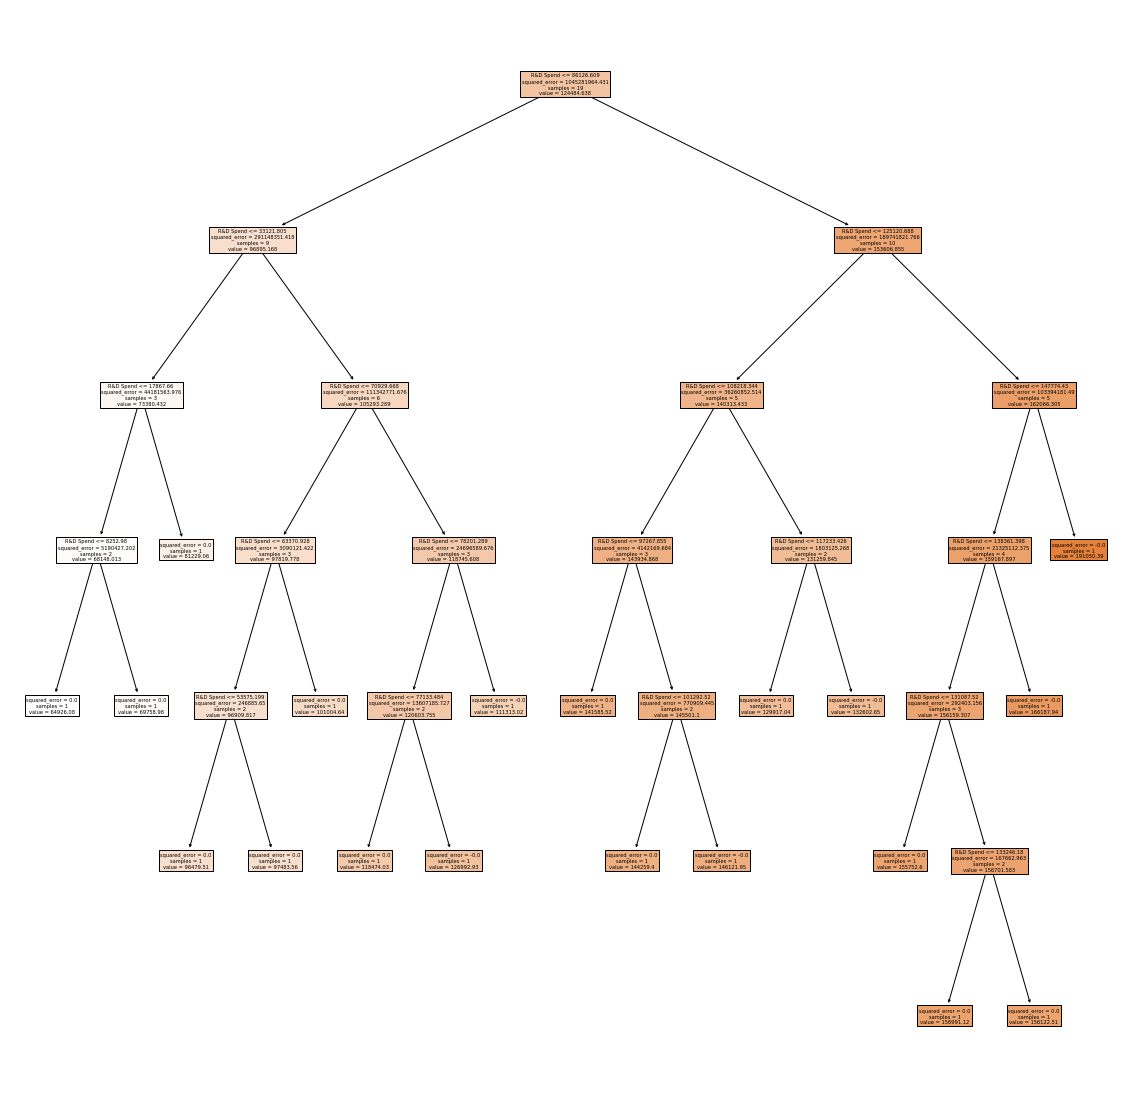

In [39]:
plt.figure(figsize=(20,20))
_ = tree.plot_tree(model.estimators_[0], feature_names=X.columns, filled=True)